<a href="https://colab.research.google.com/github/xub2/gemini_backend/blob/master/%EC%9B%B9%ED%88%B0_%EB%B2%88%EC%97%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q paddlepaddle paddleocr #사용할 OCR 모델 import
!pip install Pillow==9.5.0 #이미지 편집을 위한 Pillow 라이브러리 다운그레이드

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

## 샘플 이미지 불러오기

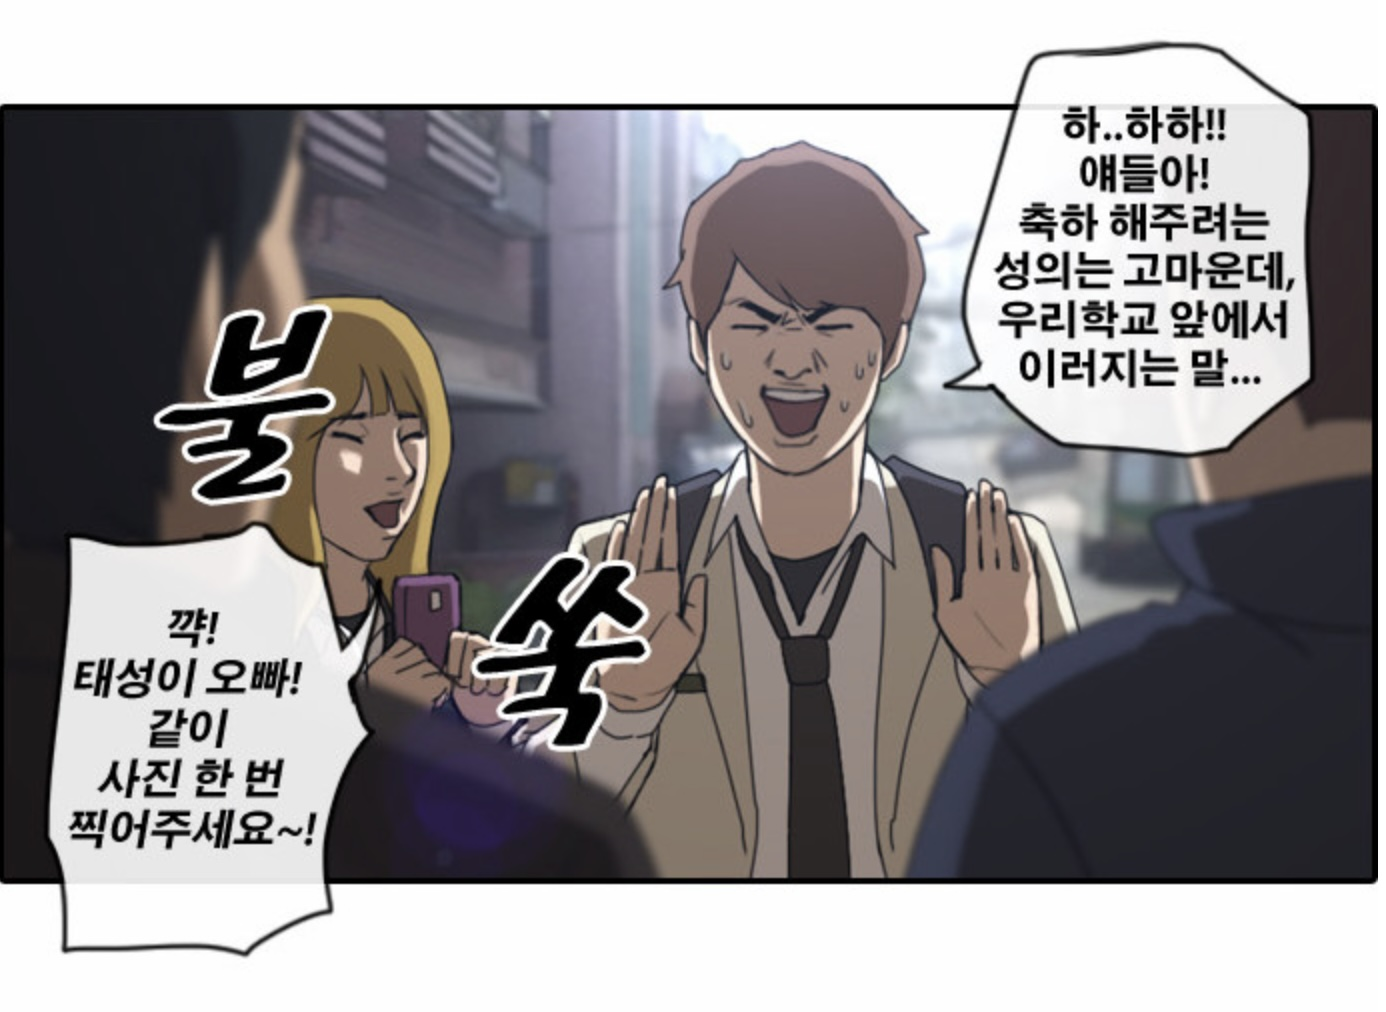

In [ ]:
!wget -q https://i.imgur.com/V3xy62E.jpg -O input.jpg #샘플 이미지 불러오기

from PIL import Image
img = Image.open("input.jpg")
img

In [ ]:
!paddleocr --image_dir input.jpg --lang=korean #CLI 방식을 이용한 사진에 대한 OCR 작업 실행, Text Detection, Recognation Process

download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer/Multilingual_PP-OCRv3_det_infer.tar
100% 3.85M/3.85M [00:16<00:00, 230kiB/s] 
download https://paddleocr.bj.bcebos.com/PP-OCRv4/multilingual/korean_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer/korean_PP-OCRv4_rec_infer.tar
100% 24.4M/24.4M [00:19<00:00, 1.26MiB/s]
download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar
100% 2.19M/2.19M [00:06<00:00, 355kiB/s]
[2023/12/03 09:28:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir='input.jpg', page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/

In [ ]:
from paddleocr import PaddleOCR, draw_ocr

ocr = PaddleOCR(lang="korean")

[2023/12/03 09:28:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, re

In [ ]:
img_path = "input.jpg" #결과 값을 프로젝트에 이용하기 위해 변수로 지정하는 코드

result = ocr.ocr(img_path, cls=False)

for r in result[0]:
    print(r)  # 결과값은 좌표들과 Text, 신뢰(정확)도 순서로 출력됨

[2023/12/03 09:28:37] ppocr DEBUG: dt_boxes num : 18, elapsed : 1.1734013557434082
[2023/12/03 09:28:57] ppocr DEBUG: rec_res num  : 18, elapsed : 19.853315353393555
[[[1062.0, 103.0], [1226.0, 107.0], [1225.0, 143.0], [1061.0, 139.0]], ('하하하!!', 0.9994818568229675)]
[[[1079.0, 151.0], [1212.0, 154.0], [1211.0, 194.0], [1078.0, 191.0]], ('얘들아!', 0.9989981651306152)]
[[[1016.0, 200.0], [1106.0, 200.0], [1106.0, 243.0], [1016.0, 243.0]], ('축하', 0.9998721480369568)]
[[[1109.0, 203.0], [1269.0, 203.0], [1269.0, 243.0], [1109.0, 243.0]], ('해주려는', 0.999555230140686)]
[[[992.0, 244.0], [1116.0, 244.0], [1116.0, 296.0], [992.0, 296.0]], ('성의는', 0.9999622702598572)]
[[[1123.0, 250.0], [1291.0, 250.0], [1291.0, 290.0], [1123.0, 290.0]], ('고마운데', 0.9999856948852539)]
[[[996.0, 296.0], [1161.0, 296.0], [1161.0, 341.0], [996.0, 341.0]], ('우리학교', 0.9999443292617798)]
[[[1168.0, 296.0], [1291.0, 296.0], [1291.0, 342.0], [1168.0, 342.0]], ('앞에서', 0.9999777674674988)]
[[[1019.0, 345.0], [1180.0, 350.0]

In [ ]:
!wget -q https://github.com/kairess/toy-datasets/raw/master/NanumSquareNeo-Variable.ttf #OCR 시각화를 위한 한국어 폰트 다운로드

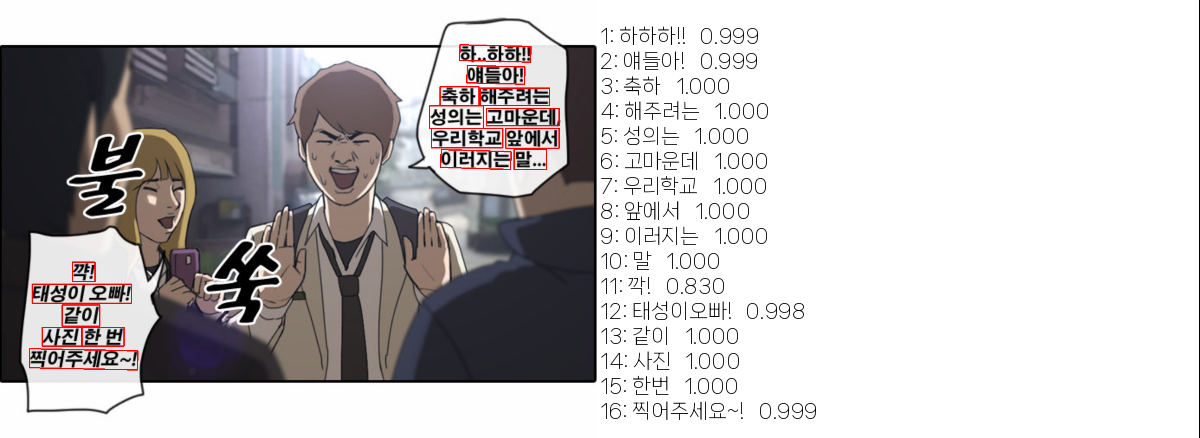

In [ ]:
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

result_np = draw_ocr(img, boxes, txts, scores, font_path='NanumSquareNeo-Variable.ttf') #draw_ocr 함수를 이용하여 시각화
result_img = Image.fromarray(result_np)

result_img

In [ ]:
boxes = [] #일반적인 좌표 형태인 [x,y,w,h] 형태로 변경

for i, r in enumerate(result[0]):
    x1, y1 = r[0][0]
    x2, y2 = r[0][2]
    w, h = x2 - x1, y2 - y1

    text, conf = r[1]

    boxes.append([int(x1), int(y1), int(w), int(h), text, conf, i]) #차례대로 x,y,w,h , text, 신뢰도 , index 순으로 출력

boxes

[[1062, 103, 163, 40, '하하하!!', 0.9994818568229675, 0],
 [1079, 151, 132, 43, '얘들아!', 0.9989981651306152, 1],
 [1016, 200, 90, 43, '축하', 0.9998721480369568, 2],
 [1109, 203, 160, 40, '해주려는', 0.999555230140686, 3],
 [992, 244, 124, 52, '성의는', 0.9999622702598572, 4],
 [1123, 250, 168, 40, '고마운데', 0.9999856948852539, 5],
 [996, 296, 165, 45, '우리학교', 0.9999443292617798, 6],
 [1168, 296, 123, 46, '앞에서', 0.9999777674674988, 7],
 [1019, 345, 160, 46, '이러지는', 0.9999741315841675, 8],
 [1187, 345, 75, 46, '말', 0.999966025352478, 9],
 [167, 605, 52, 45, '깍!', 0.8296332359313965, 10],
 [74, 656, 229, 44, '태성이오빠!', 0.9977157711982727, 11],
 [143, 704, 87, 49, '같이', 0.9999899864196777, 12],
 [97, 756, 91, 43, '사진', 0.9997052550315857, 13],
 [189, 756, 97, 43, '한번', 0.9999526143074036, 14],
 [68, 805, 249, 49, '찍어주세요~!', 0.9985564351081848, 15]]

In [ ]:
#chat gpt를 이용한 밀도기반 클러스터링(가까이 있는 박스들끼리 그룹화)
import numpy as np
from sklearn.cluster import DBSCAN

def calculate_center(box):
    # box format: [x, y, w, h]
    center_x = box[0] + box[2] / 2
    center_y = box[1] + box[3] / 2
    return np.array([center_x, center_y])

def cluster_boxes(boxes, eps):
    # Calculate centers
    centers = np.array([calculate_center(box) for box in boxes])

    # Apply DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=1).fit(centers)
    labels = clustering.labels_

    # Group boxes by cluster
    clusters = {}
    for i, label in enumerate(labels):
        if label in clusters:
            clusters[label].append(i)
        else:
            clusters[label] = [i]

    return list(clusters.values())

In [ ]:
clusters = cluster_boxes(boxes, 100) #클러스터링 된 결과값을 index를 이용하여 출력

clusters

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15]]

In [ ]:
ocr_result = []

for c in clusters: #클러스터링 된 인덱스 값을 정제
    sub_result = []

    for i, box in enumerate(boxes):
        if i in c:
            sub_result.append(box)

    ocr_result.append(sub_result)

ocr_result

[[[1062, 103, 163, 40, '하하하!!', 0.9994818568229675, 0],
  [1079, 151, 132, 43, '얘들아!', 0.9989981651306152, 1],
  [1016, 200, 90, 43, '축하', 0.9998721480369568, 2],
  [1109, 203, 160, 40, '해주려는', 0.999555230140686, 3],
  [992, 244, 124, 52, '성의는', 0.9999622702598572, 4],
  [1123, 250, 168, 40, '고마운데', 0.9999856948852539, 5],
  [996, 296, 165, 45, '우리학교', 0.9999443292617798, 6],
  [1168, 296, 123, 46, '앞에서', 0.9999777674674988, 7],
  [1019, 345, 160, 46, '이러지는', 0.9999741315841675, 8],
  [1187, 345, 75, 46, '말', 0.999966025352478, 9]],
 [[167, 605, 52, 45, '깍!', 0.8296332359313965, 10],
  [74, 656, 229, 44, '태성이오빠!', 0.9977157711982727, 11],
  [143, 704, 87, 49, '같이', 0.9999899864196777, 12],
  [97, 756, 91, 43, '사진', 0.9997052550315857, 13],
  [189, 756, 97, 43, '한번', 0.9999526143074036, 14],
  [68, 805, 249, 49, '찍어주세요~!', 0.9985564351081848, 15]]]

In [ ]:
final_result = [] #정제된 결과 값을 통해 그룹화된 box들을 한 문장으로 연결

for sub_result in ocr_result:
    x1 = sub_result[0][0]
    y1 = sub_result[0][1]
    x2 = sub_result[-1][0] + sub_result[-1][2]
    y2 = sub_result[-1][1] + sub_result[-1][3]

    w, h = x2 - x1, y2 - y1

    text = ""

    for r in sub_result:
        text += r[4] + " "

    text = text.strip()

    final_result.append([x1, y1, w, h, text])

final_result

[[1062, 103, 200, 288, '하하하!! 얘들아! 축하 해주려는 성의는 고마운데 우리학교 앞에서 이러지는 말'],
 [167, 605, 150, 249, '깍! 태성이오빠! 같이 사진 한번 찍어주세요~!']]

In [ ]:
!pip install -q translate

In [ ]:
from translate import Translator #한글을 영어로 번역

translator = Translator(from_lang="ko", to_lang="en") #한글 to 영어

for i, r in enumerate(final_result):
    text_en = translator.translate(r[4])

    final_result[i].append(text_en.upper())

final_result

[[1062,
  103,
  200,
  288,
  '하하하!! 얘들아! 축하 해주려는 성의는 고마운데 우리학교 앞에서 이러지는 말',
  "HAHAHA!! KIDS! I APPRECIATE YOUR SINCERITY TO CONGRATULATE ME, BUT YOU DON'T SAY THIS IN FRONT OF OUR SCHOOL"],
 [167,
  605,
  150,
  249,
  '깍! 태성이오빠! 같이 사진 한번 찍어주세요~!',
  'KAK! TAESUNG! PLEASE TAKE A PICTURE TOGETHER ~!']]

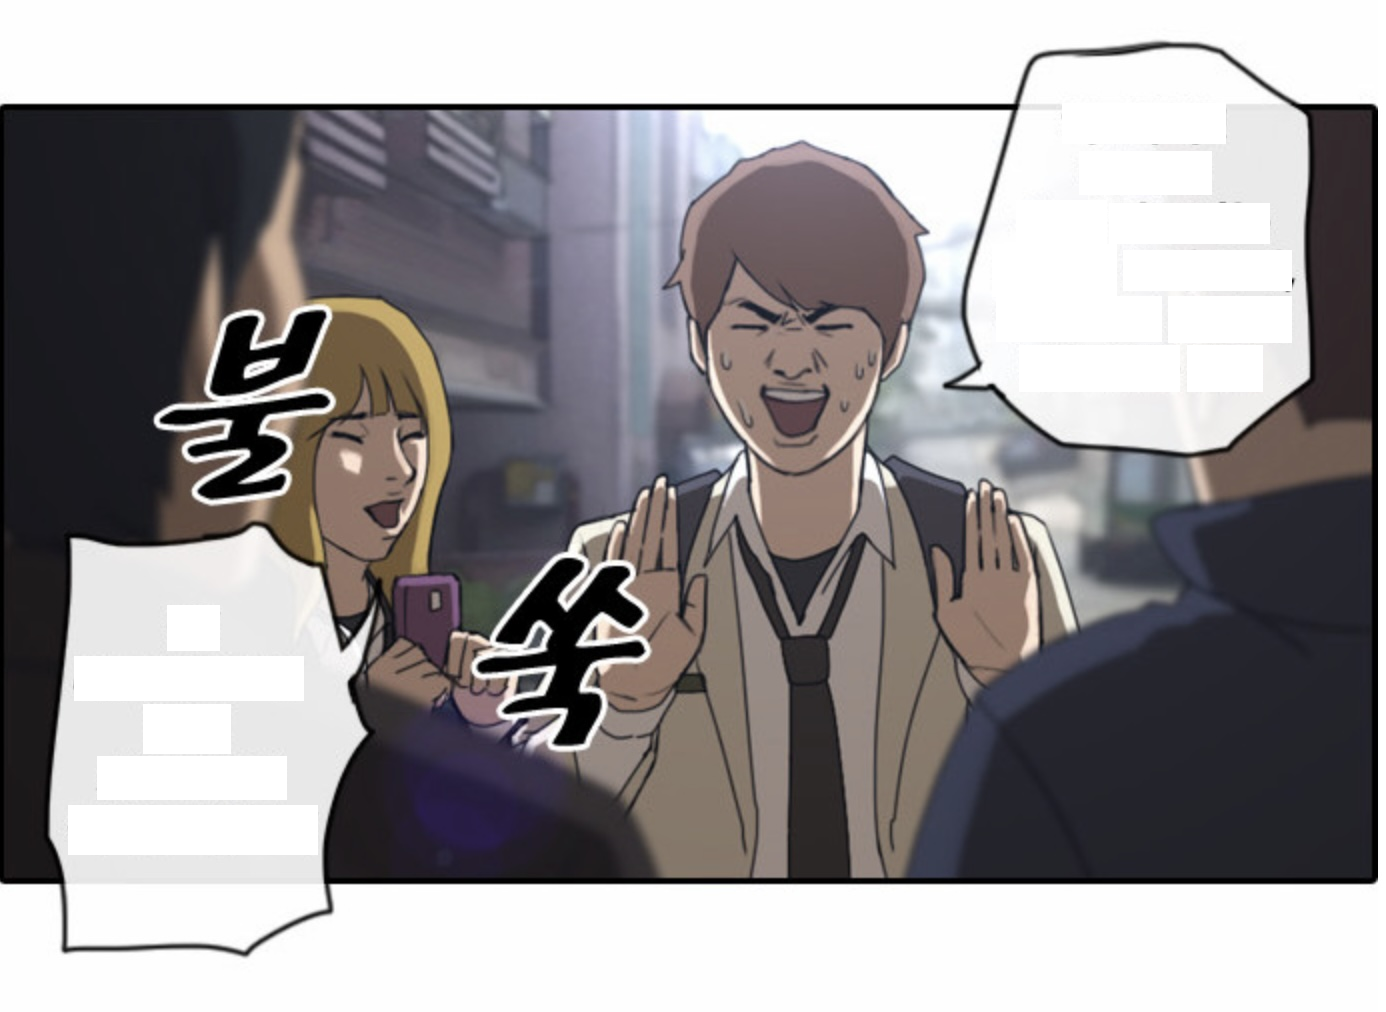

In [ ]:
from PIL import Image, ImageDraw

result_img = img.copy()  #이미지 불러오기

draw = ImageDraw.Draw(result_img) # 이미지에 대한 ImageDraw 객체 생성

for box in boxes: #bounding box를 따라 흰색 사각 테두리 생성 후 테두리 및 fill 되는 색상을 흰색으로 지정
    x1, y1, w, h, _, _, _ = box
    x2 = x1 + w
    y2 = y1 + h

    draw.rectangle([(x1, y1), (x2, y2)], outline="white", fill="white")

result_img

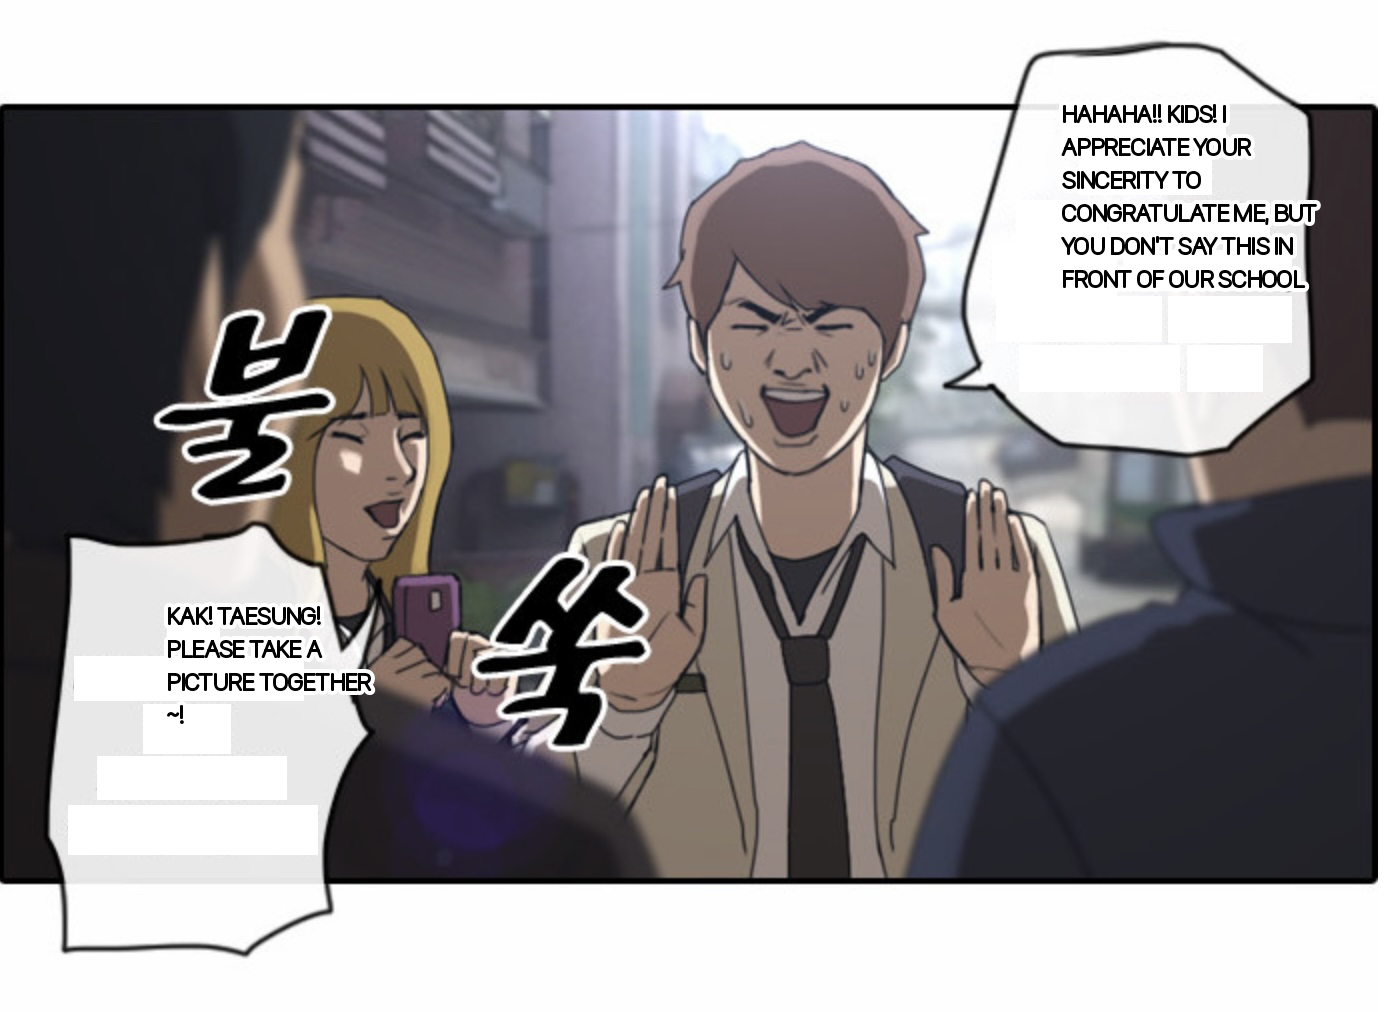

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import textwrap #줄바꿈을 도와주는 python 패키지

result_img2 = result_img.copy()

draw = ImageDraw.Draw(result_img2)

for r in final_result:
    x1, y1, w, h, text_ko, text_en = r

    text_position = (x1, y1)

    font = ImageFont.truetype("/content/NanumSquareNeo-Variable.ttf", 20)
    wrapped_text = textwrap.wrap(text_en, width=w/9) #설정된 길이를 넘어가면 줄바꿈 해주는 코드

    line_height = font.getsize("hg")[1] * 1.5
    for line in wrapped_text:
        draw.text(text_position, line, fill="black", font=font, stroke_width=5, stroke_fill="white")
        draw.text(text_position, line, fill="black", font=font, stroke_width=1, stroke_fill="black")
        text_position = (text_position[0], text_position[1] + line_height)

result_img2

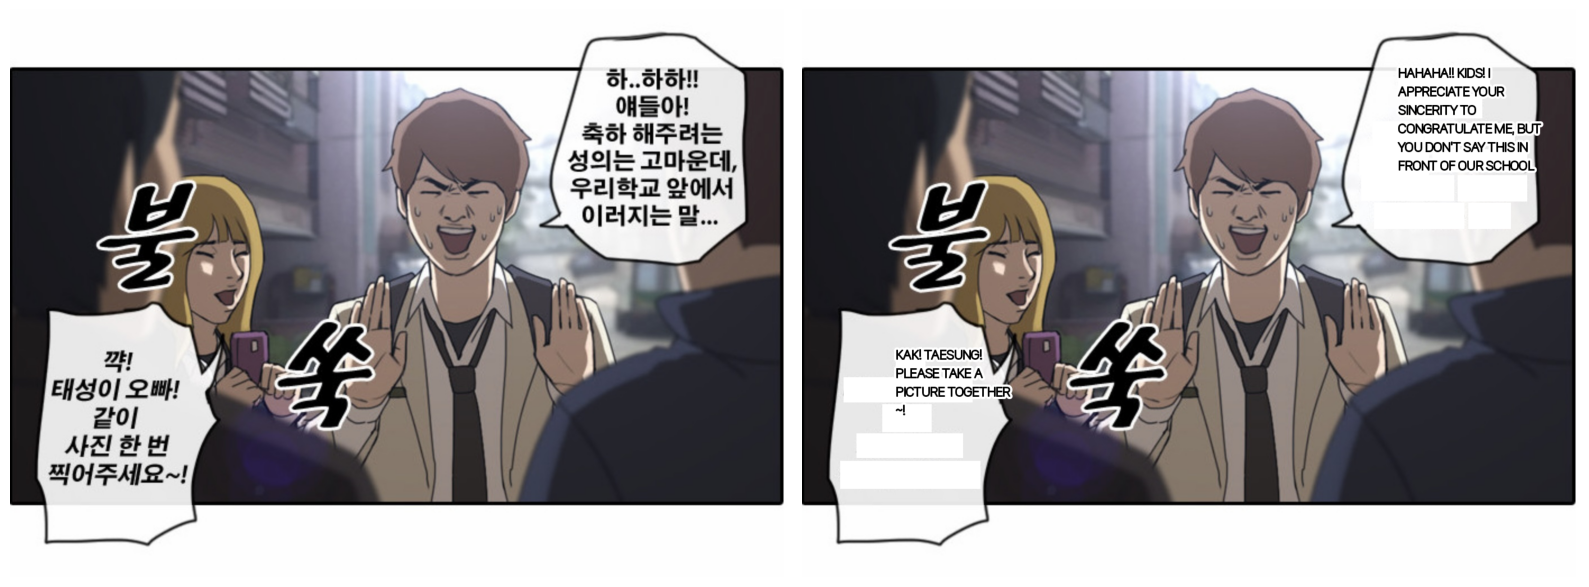

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(img)
axes[1].imshow(result_img2)
axes[0].axis("off")
axes[1].axis("off")
plt.tight_layout()
plt.show()